<a href="https://colab.research.google.com/github/sophia1kucan/Next.js/blob/main/Stats_CW1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting The Median House Price (Task a)

In [ ]:
#Installing necessary packages and preparing the environment
install.packages('fitdistrplus')
install.packages("dplyr")
install.packages("car")
library(car)
library(readr)
library(ggplot2)
library(fitdistrplus)
library(tidyr)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData

Loading required package: MASS

Loading required package: survival


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#An overview of the data:


In [ ]:
#Loading the data
data <- read.csv('BostonTrain.csv')

#Providing an overview of the data

str(data)
summary(data$medv)

head(data)

sum(is.na(data))

'data.frame':	404 obs. of  8 variables:
 $ medv   : num  12 19.9 19.4 13.4 18.2 24.6 21.1 24.7 8.7 27.5 ...
 $ crim   : num  15.0234 0.6274 0.0347 7.0504 0.7258 ...
 $ zn     : num  0 0 35 0 0 0 0 85 0 0 ...
 $ rm     : num  5.3 5.83 6.03 6.1 5.73 ...
 $ age    : num  97.3 56.5 23.3 85.1 69.5 14.7 34.5 35.7 100 100 ...
 $ dis    : num  2.1 4.5 6.64 2.02 3.8 ...
 $ ptratio: num  20.2 21 16.9 20.2 21 19.6 20.2 17.3 20.2 20.2 ...
 $ lstat  : num  24.91 8.47 7.83 23.29 11.28 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   16.95   21.60   22.80   26.40   50.00 

,medv,crim,zn,rm,age,dis,ptratio,lstat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.0,15.02340,0,5.304,97.3,2.1007,20.2,24.91
2,19.9,0.62739,0,5.834,56.5,4.4986,21.0,8.47
3,19.4,0.03466,35,6.031,23.3,6.6407,16.9,7.83
4,13.4,7.05042,0,6.103,85.1,2.0218,20.2,23.29
5,18.2,0.72580,0,5.727,69.5,3.7965,21.0,11.28
6,24.6,0.19186,0,6.431,14.7,5.4159,19.6,5.08


[1] 0

#Comparing each of the variables with Median House Price:

`geom_smooth()` using formula = 'y ~ x'


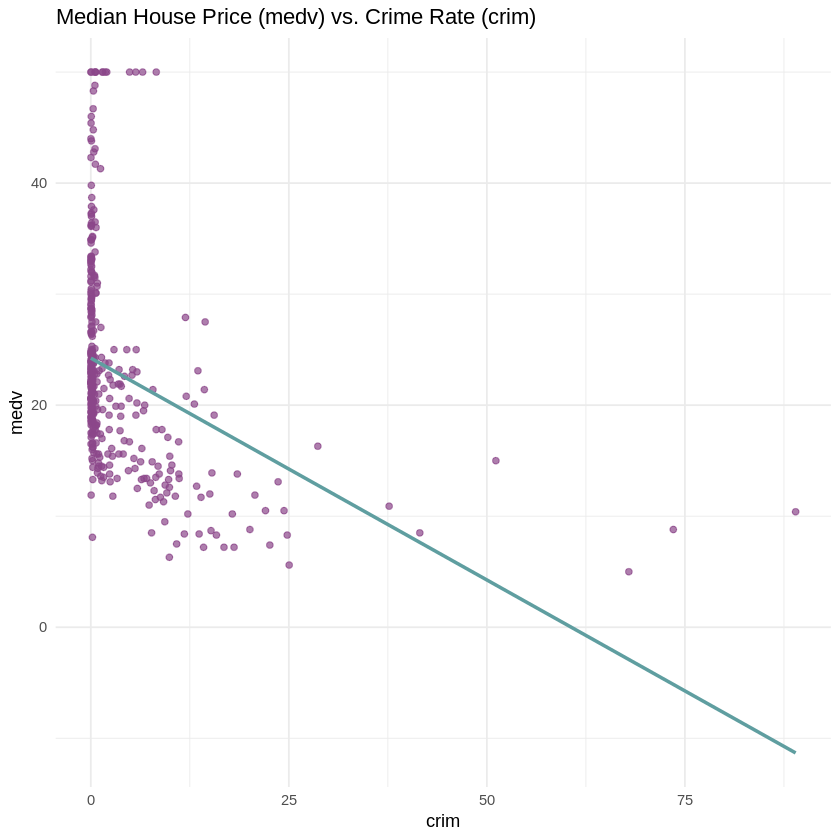

In [ ]:
#Comparing medv with crim
ggplot(data, aes(x = crim, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Crime Rate (crim)", x = "crim", y = "medv") +
  theme_minimal()

We can see a strong negative correlation between median housing price and crime rate.

There is a large amount of points at crim = 0, suggesting that most neighbourhoods have very low crime rates. In addition, there are many high median value house prices at crim = 0, suggesting high income neighbourhoods with low crime rates.


The points to the right of crim = 50 are likely to be high leverage points.
Overall, there are both high leverage points and outliers. A high influence plot would be a good idea to investigate whether these points are worth excluding to preserve model accuracy.

`geom_smooth()` using formula = 'y ~ x'


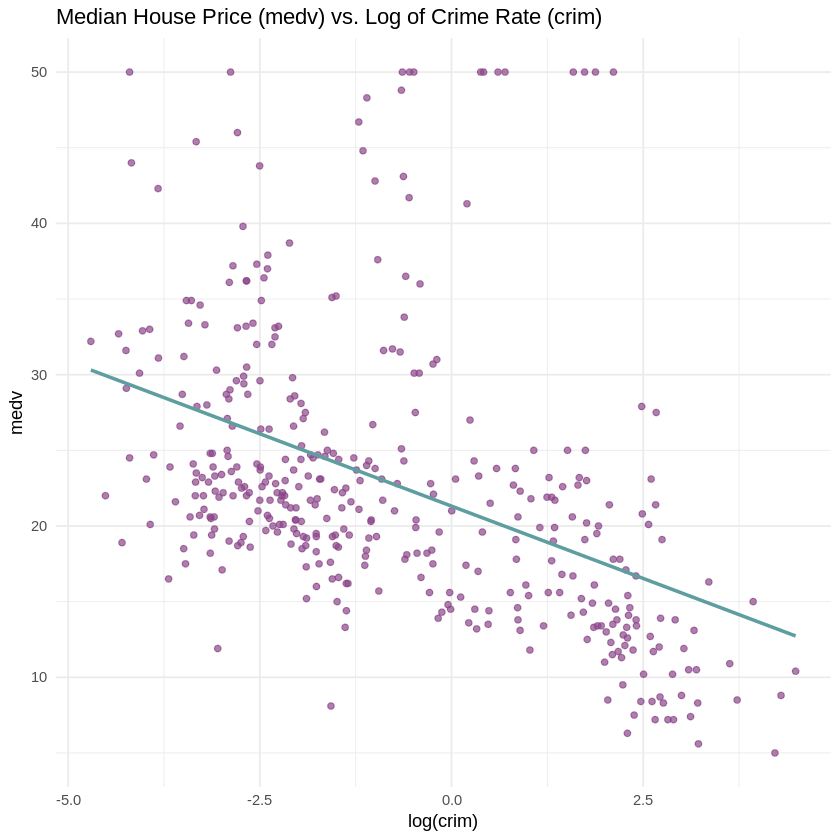

In [ ]:
#Comparing medv with log(crim)
ggplot(data, aes(x = log(crim), y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Log of Crime Rate (crim)", x = "log(crim)", y = "medv") +
  theme_minimal()

In the graph of medv vs log(crim) we can see the scatter plot is more evenly spread.

Compared to the previous plot, the relationship seems more linear and the negative correlation is still present.

There are still many outliers in this plot.

Overall, log(crim) is likely to produce more accurate predictions than just crim.

`geom_smooth()` using formula = 'y ~ x'


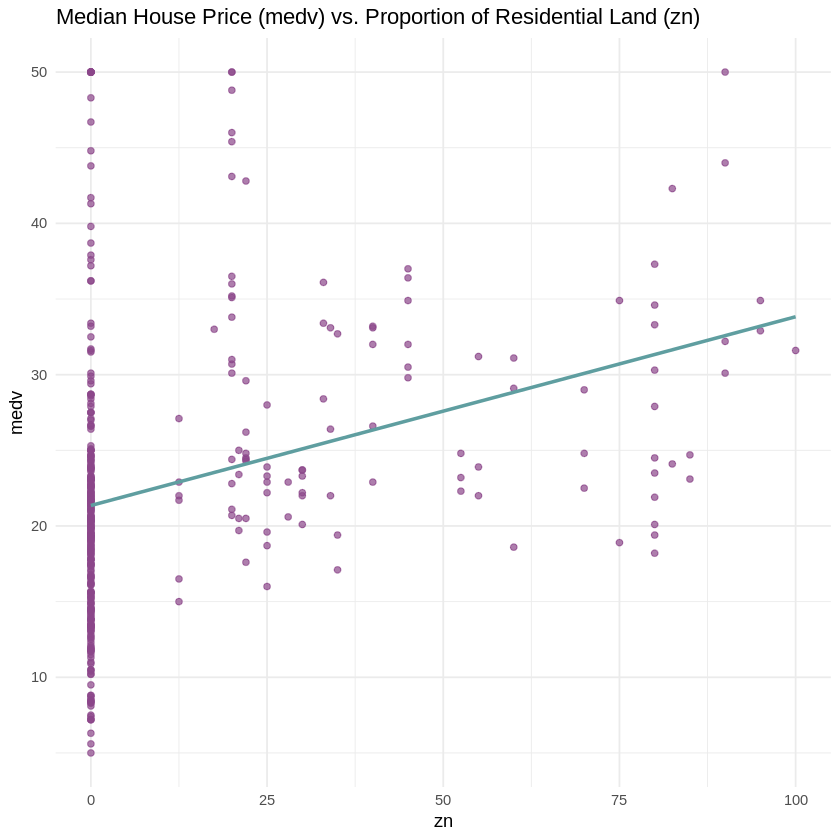

In [ ]:
#Comparing medv with zn
ggplot(data, aes(x = zn, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Proportion of Residential Land (zn)", x = "zn", y = "medv") +
  theme_minimal()

There is a positive correlation between zn and medv, meaning higher zn values are associated with higher median house prices.

However, the correlation is weak, as we can see the data points are quite widely spread out. There are a lot of data points around zn = 0, this suggests there is a large number of houses with no residential land.

The large amount of points at zn = 0 will pull the regression line downwards, affecting the slope.

Since the correlation is relatively weak with a lot of outliers, proportion of residential land is unlikley to be a particularly strong indicator of median house price.

`geom_smooth()` using formula = 'y ~ x'


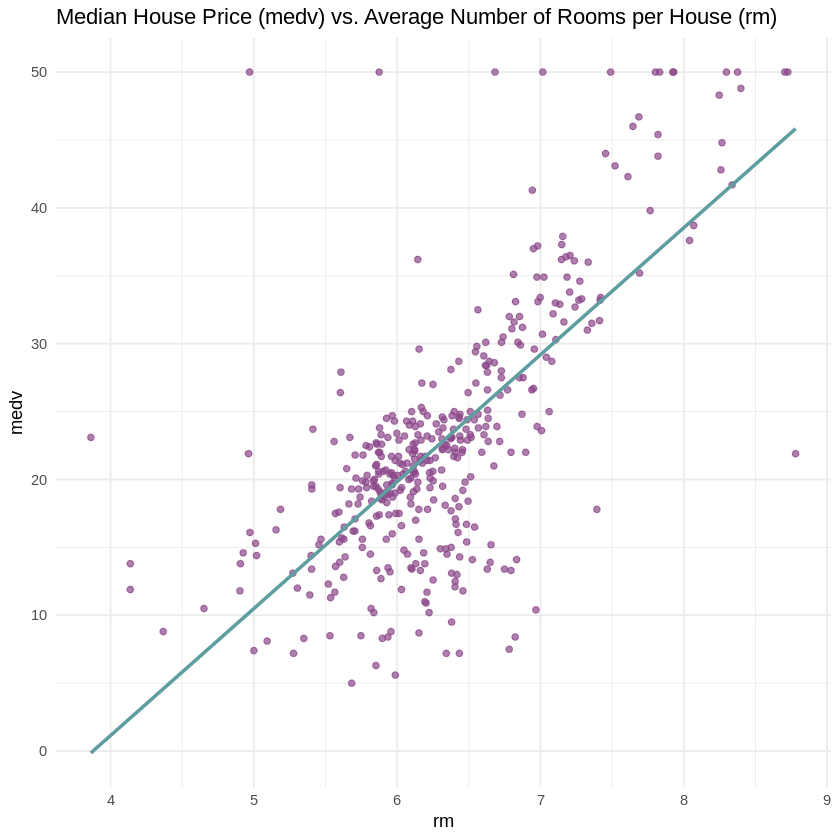

In [ ]:
#Comparing medv with rm
ggplot(data, aes(x = rm, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Average Number of Rooms per House (rm)", x = "rm", y = "medv") +
  theme_minimal()

We can see a fairly strong positive correlation between median house price and avergage number of rooms, as the number of rooms increases so does the house price.

There is less variability in medv for a given rm, indicating that rm is a relatively accurate predictor for housing prices.

There are some outliers, in particular rm = 8-9 where medv = 50. This could indicate there are some properties worth more than others with the same number of rooms, they could have larger rooms, or be higher quality overall. On the opposite end, there are some points with rm = 6-7 with a medv far below the trend line, around 10-15. This could indicate undervalued or lower quality houses.


`geom_smooth()` using formula = 'y ~ x'


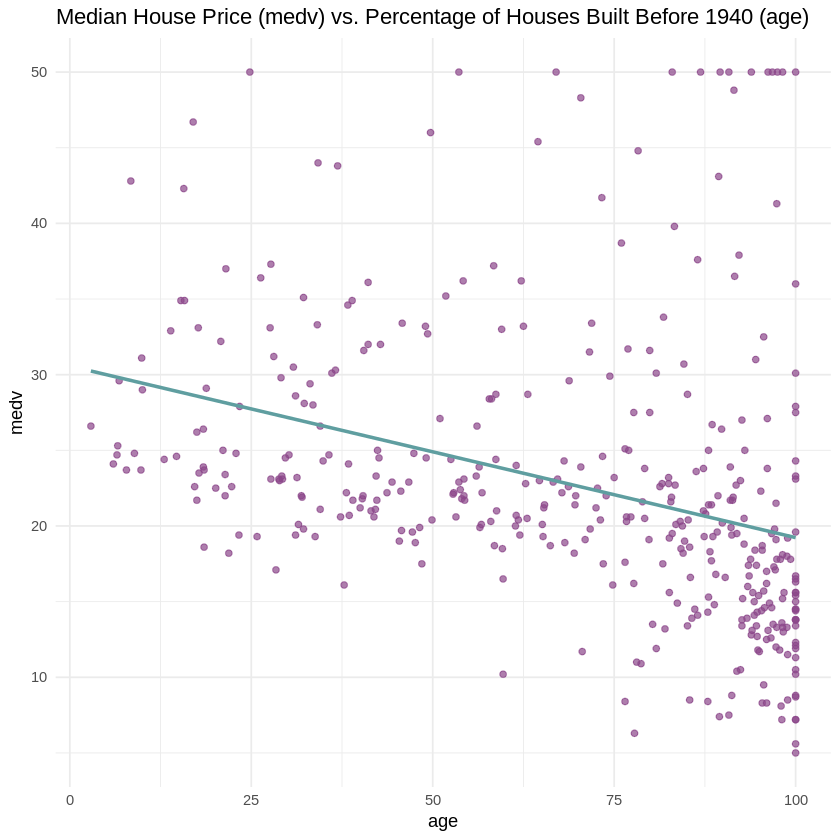

In [ ]:
#Comparing medv with age
ggplot(data, aes(x = age, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Percentage of Houses Built Before 1940 (age)", x = "age", y = "medv") +
  theme_minimal()

We can see there is some degree of negative correlation between median house price and percentage of houses built before 1940. However, the correlation is fairly weak with a high degree of variability in the house prices at each age level. The spread of points means there are likely other factors that also influence the price of houses and that age alone is unlikely to be an accurate predictor.


`geom_smooth()` using formula = 'y ~ x'


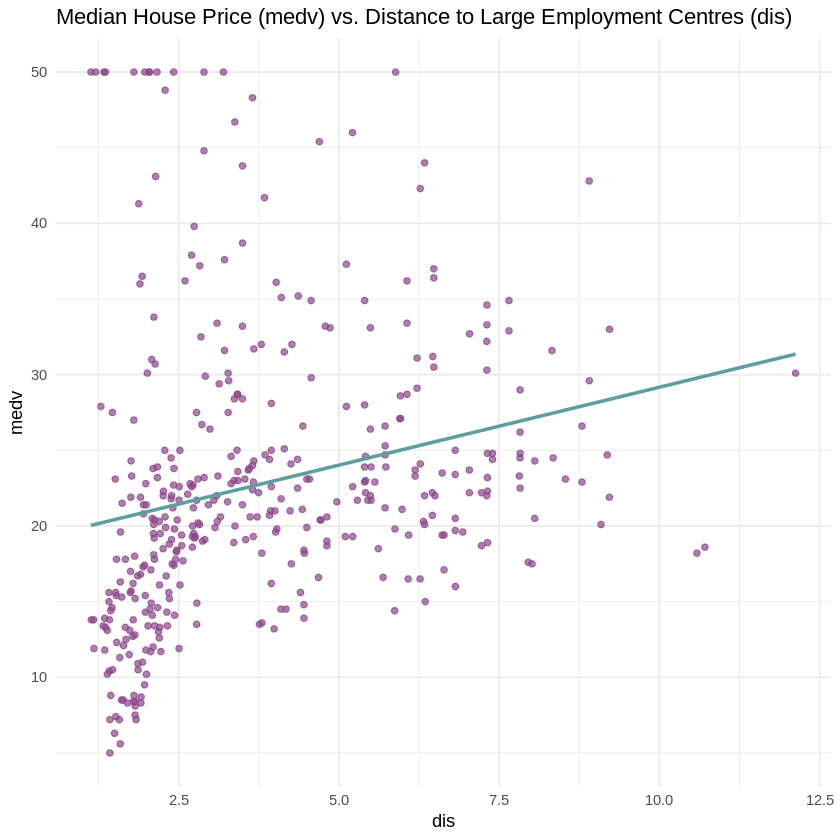

In [ ]:
#Comparing medv with dis
ggplot(data, aes(x = dis, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Distance to Large Employment Centres (dis)", x = "dis", y = "medv") +
  theme_minimal()

We can see there is a weak positive correlation between median house price and the distance to large employment centres.
Which is unexpected to some extent, as one would expect the houses closer to large employment centres to have much higher prices. For example, house prices in the centre of London are much more expensive than the houses on the outskirts.

Most data points are bewteen dis = 1-5. There are many outliers at both small and large distances.

The weak correlation implies other factors are likely to be important in predicting house prices.

Since there's quite a few high leverage points, we should try transforming the graph to see if that provides a better model fit.

`geom_smooth()` using formula = 'y ~ x'


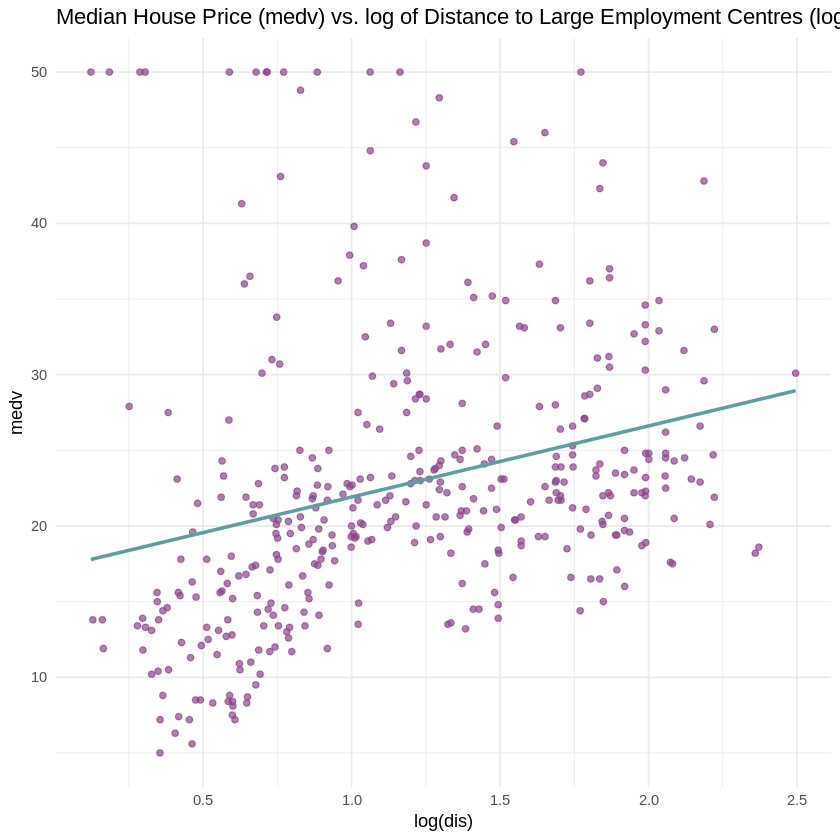

In [ ]:
#Comparing medv with log(dis)
ggplot(data, aes(x = log(dis), y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. log of Distance to Large Employment Centres (log(dis))", x = "log(dis)", y = "medv") +
  theme_minimal()

There is still a weak positive correlation, however compared to the previous plot, in this one the data points are more evenly spread along the x axis. This mean the data is less likely to be skewed than in the raw version.

This plot shows that homes further from large employment centres have higher house prices.



`geom_smooth()` using formula = 'y ~ x'


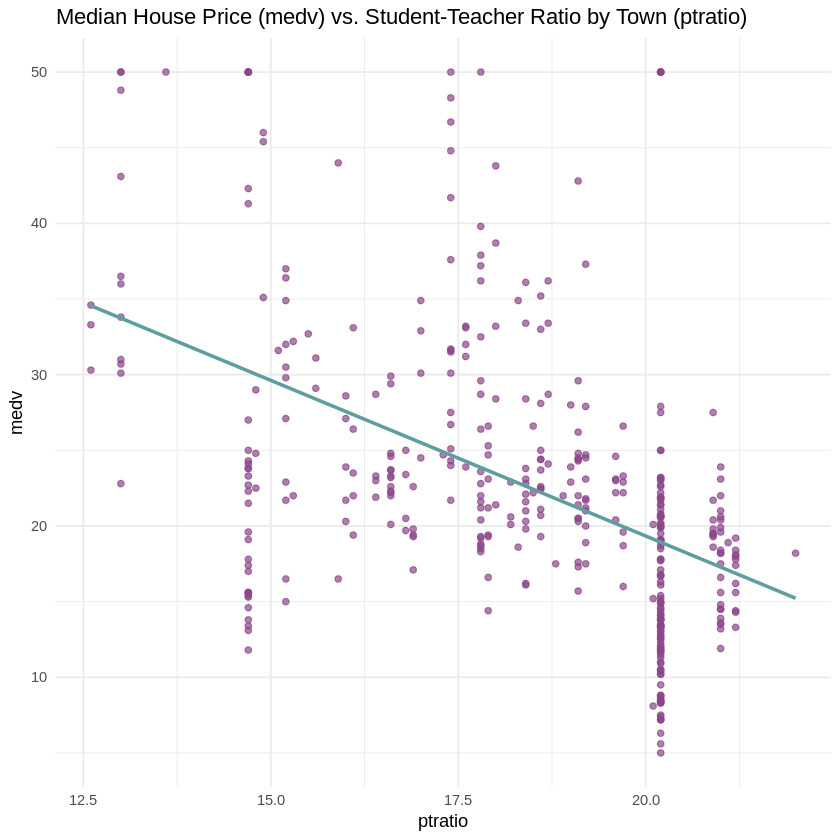

In [ ]:
#Comparing medv with ptratio
ggplot(data, aes(x = ptratio, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Student-Teacher Ratio by Town (ptratio)", x = "ptratio", y = "medv") +
  theme_minimal()

We can see there is relatively weak negative correlation between median house price and student-teacher ratio. This suggests that towns with a higher student-teacher ratio have lower house prices on average. This intuitively makes sense as more students per teacher could imply larger class sizes and lower education quality, thus making the area less desirable and therefore the houses cheaper.

There is a large amount of scatter in the data and quite a few outliers especially concentrated around ptratio = 13.6 and ptratio = 20.2. This indicates that student-teacher ratio is not sufficient in predicting median house price and other factors also play a key role.

`geom_smooth()` using formula = 'y ~ x'


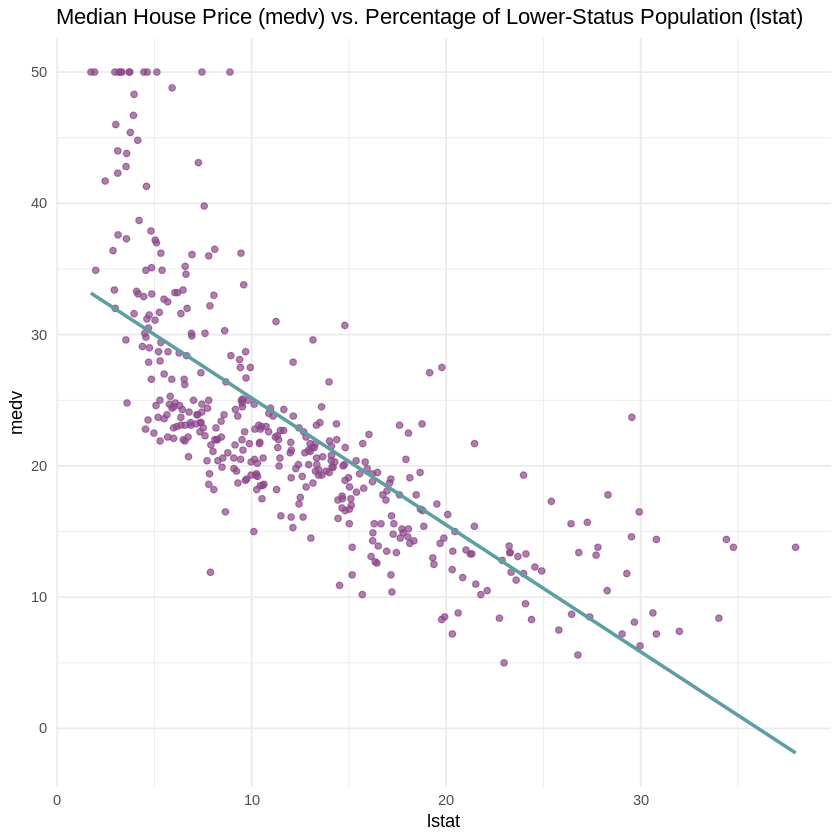

In [ ]:
#Comparing medv with lstat
ggplot(data, aes(x = lstat, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Percentage of Lower-Status Population (lstat)", x = "lstat", y = "medv") +
  theme_minimal()

We can see a fairly strong negative correlation between median house price and percentage of lower status population. Indicating that as the percentage of lower status population increases, median house prices tend to decrease, which intuitively makes sense.

The majority of the data points are between 5-20% lower status population, indicating a typical neighbourhood lies within these points.

There are a lot of outliers in the data, indicating that other factors are influential in determining house price. There are also some outliers with a very high median house price (around 50) in areas with a low percentage of lower-status population, possibly indicating more expensive neighbourhoods.

Overall, we can see that the percentage of lower-status population or neighbourhood demographic, has a relatively strong correlation with median house price.

`geom_smooth()` using formula = 'y ~ x'


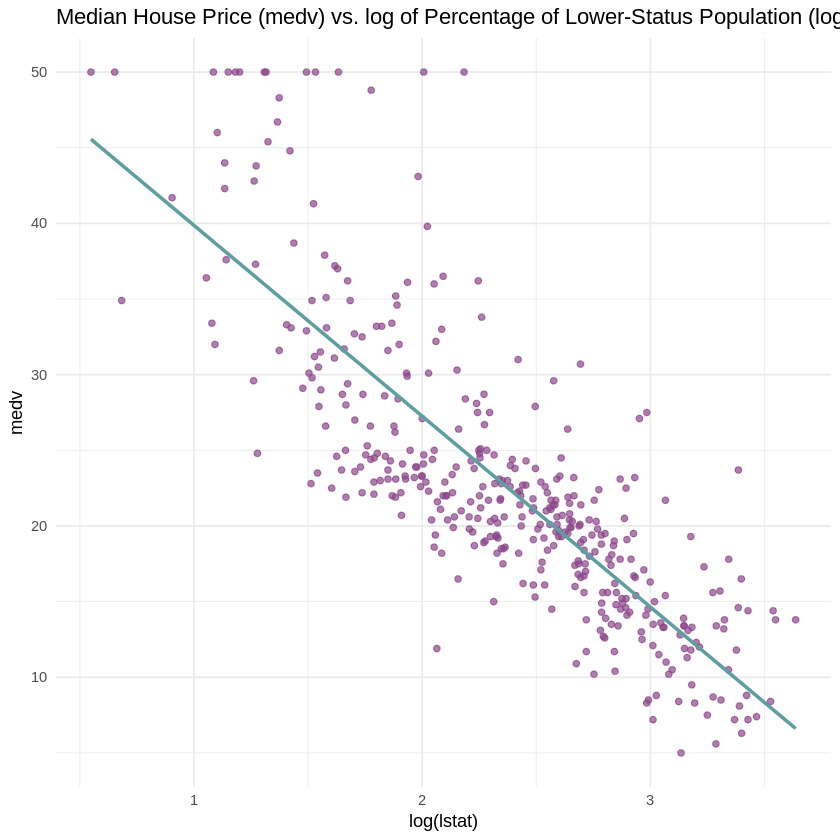

In [ ]:
#Comparing medv with log(lstat)
ggplot(data, aes(x = log(lstat), y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. log of Percentage of Lower-Status Population (log(lstat))", x = "log(lstat)", y = "medv") +
  theme_minimal()

Taking the log of the percentage of lower status population, we can see there is a very clear negative correlation between the log of lower-status population and median house price.



#Distribution of the Median House price:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


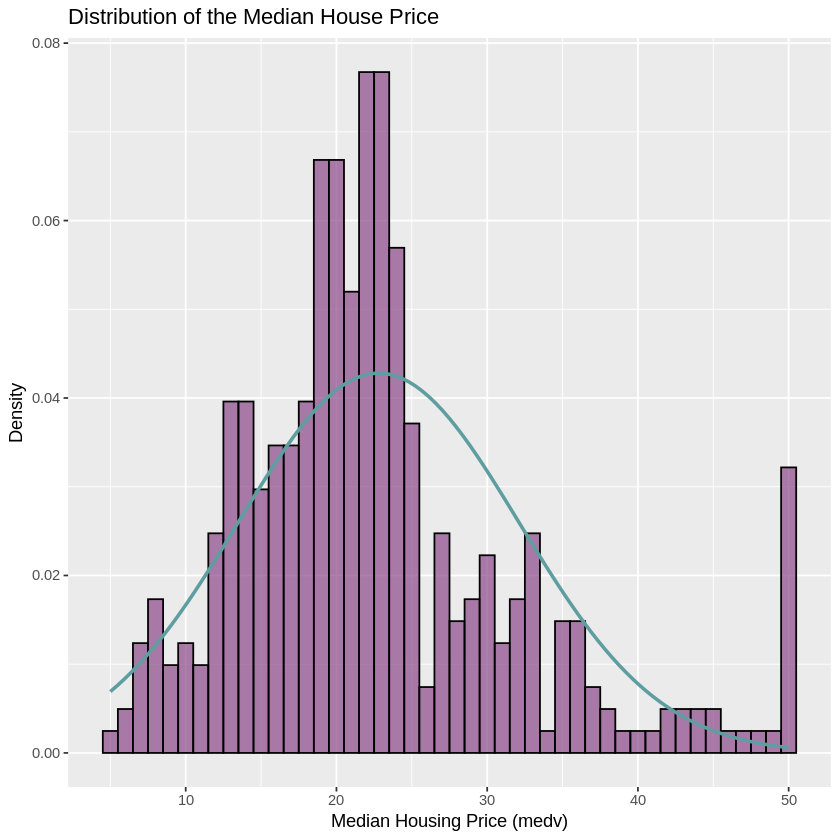

In [ ]:
# Load necessary libraries
library(ggplot2)
library(fitdistrplus)

# Fit a normal distribution to the data
col_data <- data$medv

# Ensure there are no missing values
col_data <- na.omit(col_data)

fit <- fitdist(col_data, 'norm')

mean_fit <- fit$estimate[1]
sd_fit <- fit$estimate[2]

# Convert the column data to a data frame
column_data_df <- data.frame(values = col_data)

# Histogram of the target variable, median housing price
ggplot(column_data_df, aes(x = values)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = 'orchid4', color = 'black', alpha = 0.7) +
  stat_function(
    fun = dnorm,
    args = list(mean = mean_fit, sd = sd_fit),
    color = 'cadetblue',
    size = 1
  ) +
  labs(title = 'Distribution of the Median House Price',
       x = 'Median Housing Price (medv)',
       y = 'Density')

We can see from the distrbution of median house price, the data has a central tendency, with the peak around 20-25 for the median housing price.

There is some degree of spread in the data, indicating a large amount of variation in median house price.

We can see the graph of median house price has a larger tail to the right and the graph is slightly right skewed. This shows the weight of the distribution is to the right. This indicates that there are some houses significantly more expemsive than is typical.

#Fitting a Model:

#First looking at a simple linear regression model:


Call:
lm(formula = medv ~ crim + zn + rm + age + dis + ptratio + lstat, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8835  -2.8867  -0.6322   1.7532  28.1088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.56683    4.47823   4.369 1.59e-05 ***
crim        -0.12486    0.03274  -3.814 0.000159 ***
zn           0.02283    0.01623   1.407 0.160303    
rm           4.76517    0.47254  10.084  < 2e-16 ***
age         -0.02075    0.01494  -1.389 0.165689    
dis         -1.01315    0.21150  -4.790 2.36e-06 ***
ptratio     -0.76083    0.13213  -5.758 1.71e-08 ***
lstat       -0.59899    0.05691 -10.525  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.05 on 396 degrees of freedom
Multiple R-squared:  0.7122,	Adjusted R-squared:  0.7072 
F-statistic:   140 on 7 and 396 DF,  p-value: < 2.2e-16


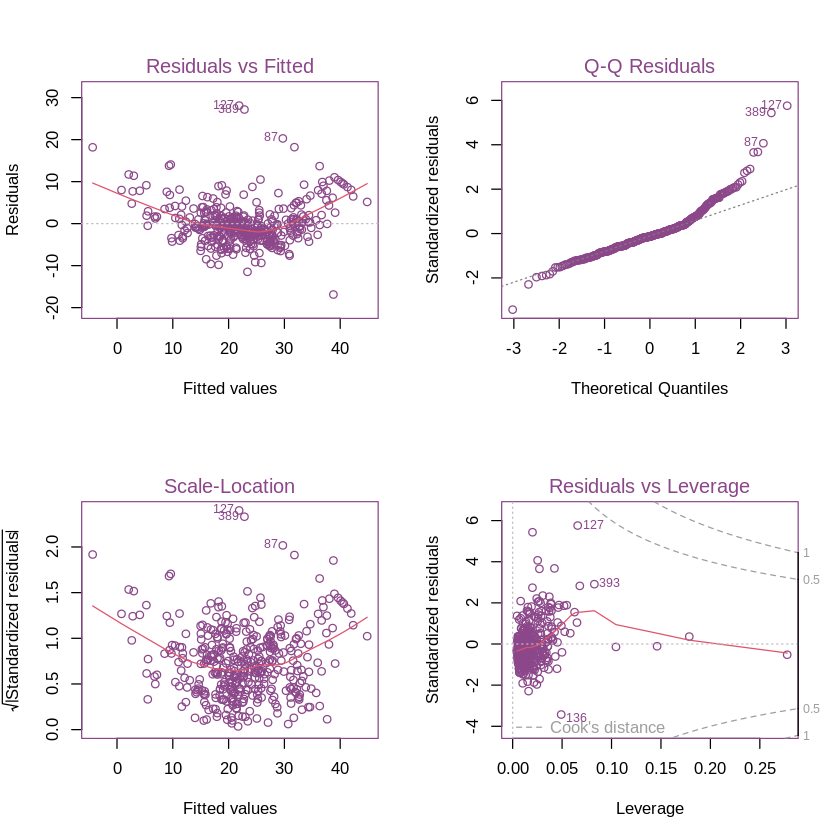

In [ ]:
#Fitting a multiple linear regression model.
model <- lm(medv ~ crim + zn + rm + age + dis + ptratio + lstat, data = data)
summary(model)

#Summary graphs of the linear model.
par(mfrow = c(2,2), col = 'orchid4')
plot(model)

In the residuals vs fitted plot, we can see the red line shows a curved pattern instead of the desired horizontal line. This indicates potential non-linearity in the relationship that is not explained by this model. We can see there are some outliers, specifically the points 369, 127, 87.

In the Q-Q residuals plot, we can see the points do not exactly follow the diagonal line, indicating the residuals are not normally distributed which suggests the model is not a good fit, as this is a key assumption of linear regression. There are also the same outliers as in the residuals vs fitted points graph.

Overall, we can see this model is not a very good one and we should make some adjustments for better predictions.



#Now creating a linear regression model with some of the variables adjusted according to the earlier analysis:


Call:
lm(formula = medv ~ log(crim) + zn + rm + age + log(dis) + ptratio + 
    log(lstat), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.822  -2.653  -0.486   2.405  25.687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.7029355  4.6466265   8.975  < 2e-16 ***
log(crim)   -0.5489955  0.1759381  -3.120  0.00194 ** 
zn          -0.0155000  0.0133581  -1.160  0.24661    
rm           3.3792094  0.4574339   7.387 8.95e-13 ***
age          0.0009841  0.0143407   0.069  0.94532    
log(dis)    -3.7913848  0.8104571  -4.678 3.98e-06 ***
ptratio     -0.7025566  0.1202000  -5.845 1.06e-08 ***
log(lstat)  -9.8531713  0.6585011 -14.963  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.57 on 396 degrees of freedom
Multiple R-squared:  0.7643,	Adjusted R-squared:  0.7601 
F-statistic: 183.5 on 7 and 396 DF,  p-value: < 2.2e-16


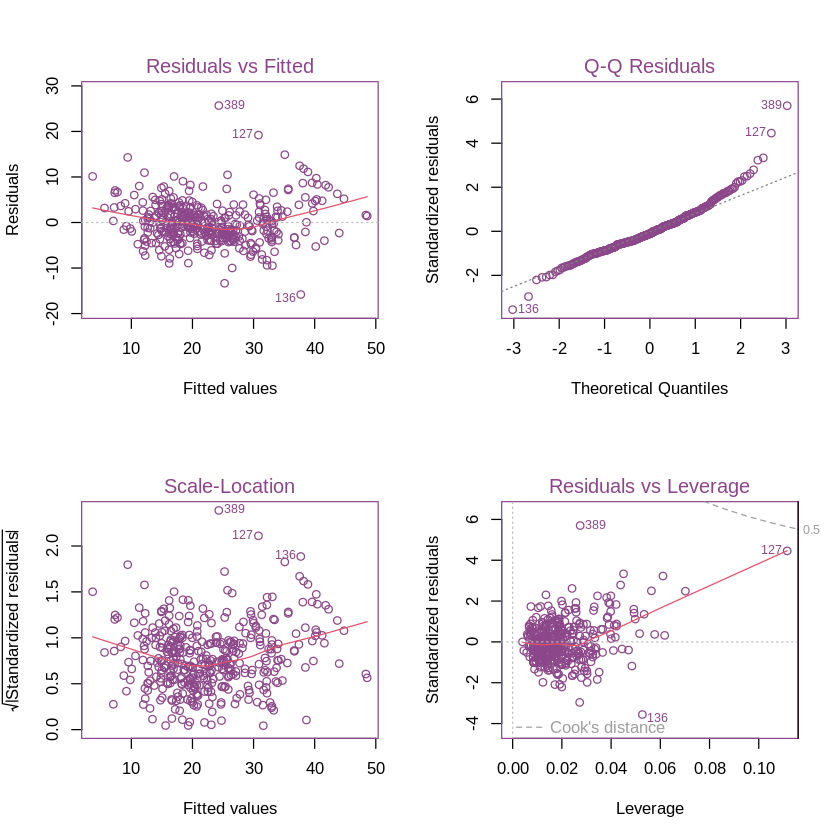

In [ ]:
#Fitting a multiple linear regression model with the adjusted variables.
model_2 <- lm(medv ~ log(crim) + zn + rm + age + log(dis) + ptratio + log(lstat), data = data)
summary(model_2)

#Saving the model for later
save(model_2, file = 'model_2')

#Summary graphs of the linear model.
par(mfrow = c(2,2), col = 'orchid4')
plot(model_2)

This model (model_2) includes adjusted variables according to our earlier analysis, log(crim), log(dis), and log(lstat).

In the residuals vs fitted plot, we can see the red line is closer to being horizontal than in model_1, indicating that this model is more accurate. There are still some outliers, points 389, 127, and 136.

In the Q-Q plot, this model is closer to following the diagonal line, indicating that it is closer to following a normal distribution than the previous one.

Overall, while this model is clearly a better model than the previous one, some adjustments could still be made. Namely, removing age because the p-value is 0.94532 which is quite high, since we want a p-value close to 0.05 for the variable to be statistically significant.

#Removing the variable age from the data:


Call:
lm(formula = medv ~ log(crim) + zn + rm + log(dis) + ptratio + 
    log(lstat), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8339  -2.6581  -0.4839   2.4177  25.6811 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.72093    4.63341   9.004  < 2e-16 ***
log(crim)   -0.54855    0.17560  -3.124  0.00192 ** 
zn          -0.01565    0.01316  -1.190  0.23486    
rm           3.38699    0.44260   7.652 1.51e-13 ***
log(dis)    -3.81914    0.70146  -5.445 9.12e-08 ***
ptratio     -0.70265    0.12004  -5.853 1.01e-08 ***
log(lstat)  -9.83740    0.61634 -15.961  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.565 on 397 degrees of freedom
Multiple R-squared:  0.7643,	Adjusted R-squared:  0.7607 
F-statistic: 214.6 on 6 and 397 DF,  p-value: < 2.2e-16


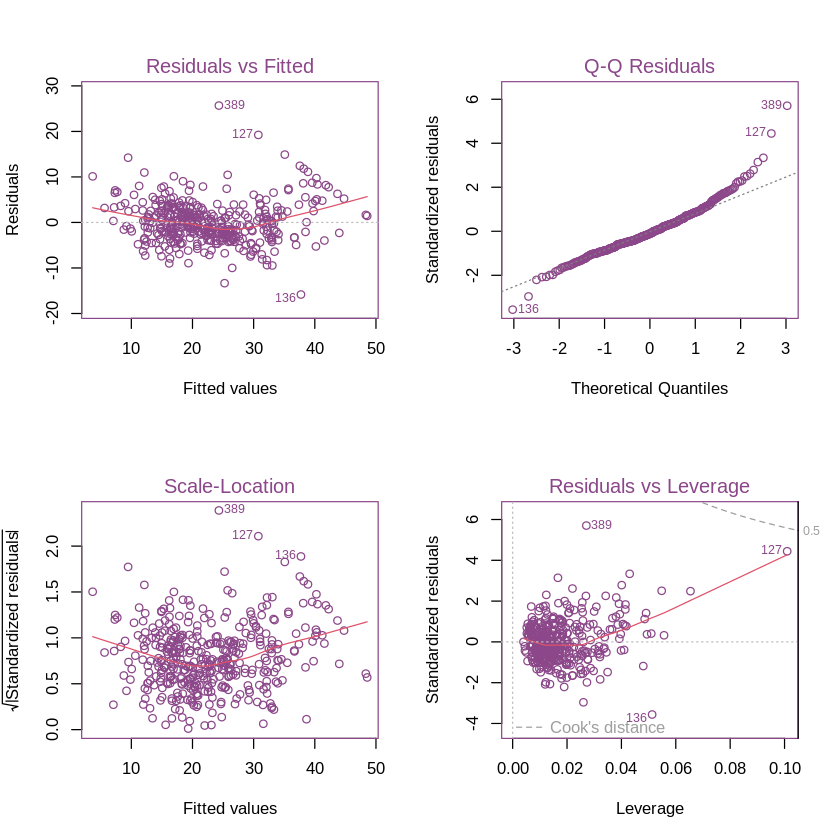

In [ ]:
#Fitting a multiple linear regression model with the adjusted variables and removing age
model_3 <- lm(medv ~ log(crim) + zn + rm + log(dis) + ptratio + log(lstat), data = data)
summary(model_3)

#Saving the model for later
save(model_3, file = 'model_3')

#Summary graphs of the linear model.
par(mfrow = c(2,2), col = 'orchid4')
plot(model_3)


We can see that the plots from this model (model_3) are very similar to the previous model (model_2). **add more**

#Creating a null model to compare with the two linear regression models:


Call:
lm(formula = medv ~ 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.797  -5.846  -1.196   3.603  27.203 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.7965     0.4643    49.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.332 on 403 degrees of freedom


hat values (leverages) are all = 0.002475248
 and there are no factor predictors; no plot no. 5



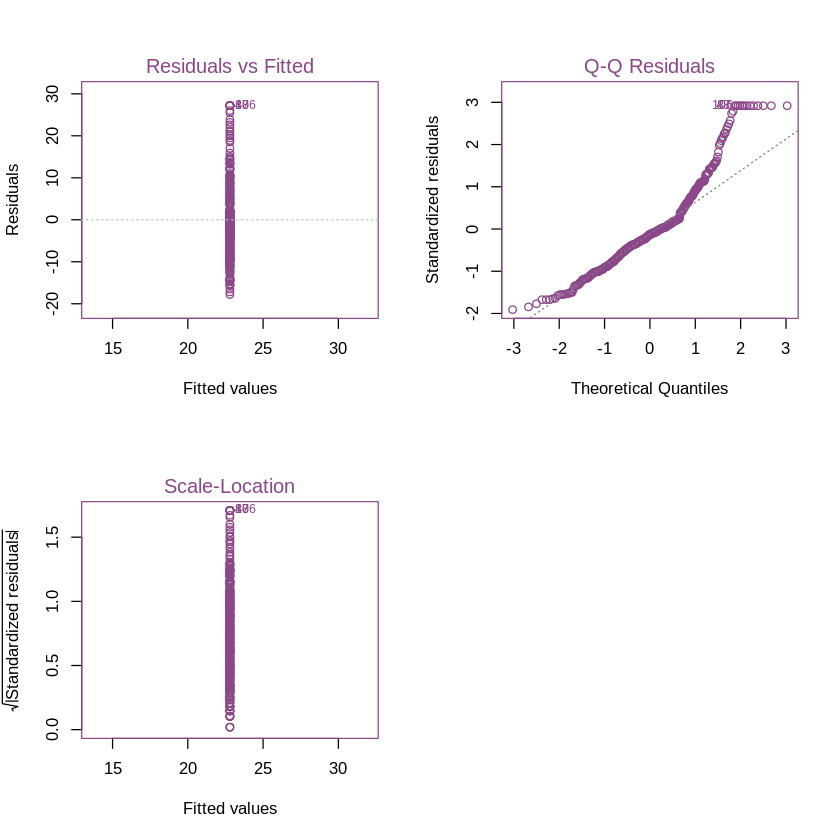

In [ ]:
#Creating a null model
null_model <- lm(medv ~ 1, data)
summary(null_model)
par(mfrow = c(2, 2), col = 'orchid4')
plot(null_model)

#Comparing The Models:

**RSE:** <br>
The residual standard error is the variability in the dependent variables not explained by the independent variables. A smaller RSE indidcates the predictions of the model are closer to the actual values and the model explains the variation in the data more effectively. So a smaller RSE indicates a better fitting model.

The RSE in the first multiple linear regression model is 5.05, in the second regression model with the adjusted variables it is 4.57, in the null model it is 9.332, and in the third model it is 4.565. 4.56 < 4.57 < 5.05 < 9.332. The much larger RSE seen in the null model indicates than in the other two models indicates the null model has a worse fit than the two regression models. The smallest residual standard error seen in the third model indicates the regression line is closer to the data points on average and suggests the third model (with adjusted values and age removed) has the best fit out of the three models. <br><br>

**Adjusted R Squared:** <br>
The adjusted R squared value can be interpreted as the proportion of the total variability in median house price accounted for by the model, a higher R squared value is desirable as it indicates a more accurate model. The adjusted R squared value is 0.7072 in the first multiple linear regression model, 0.7601 in the adjusted linear regression model, 0.7607 in the third model, and 0 for the null model, 0 < 0.7072 < 0.7601 < 0.7607.
This suggests that the first model explains a lower proportion of the variance in the median house price than the second and third models. Meaning that in terms of adjusted R squared value, we can conclude our third linear model (with adjusted variable and age removed) is a more accurate predictor. <br><br>

**F statistic:** <br>
The F statistic is a measure of the ratio of two variances, a higher F statistic indicates the predictors are more significantly associated with the median housing price. So for a more accurate model, a higher F statistic is desirable. The F statistic for the first model is 140, for the second model it is 183.5, and for the third model it is 214.6 140 < 183 < 214.6.5. This means the predictors for the third model are more significantly associated with the median housing price, indicating the third model is a more accurate model. <br><br>


**Residual vs fitted plot:** <br>
For the residual vs fitted plot, we want the residual plots to look like the dotted horizontal line (the null plots).
In the first model the line of best fit for the residuals is more strongly curved and thus further from the null plot, whereas the second (adjusted) model has a line of best fit for the residuals more closely resembling the null plot. Meaning in regards to the residual plots, the second (adjusted) model is likely to be a better model. Comparing the second model to the third, these plots are essentially the same, meaning we would need to make our judgment based off of other statistics.
<br><br>


**Q-Q plot:**<br>
Using a Q-Q plot to check normality of residuals, if the data approximately matches the straight line representing the reference t-distribution, then the assumption that the data comes from the normal distribution is validated. We can see that the Q-Q plot of the second (adjusted) model is closer to the straight line than in the first model. Comparing the two Q-Q plots suggests that the second (adjusted) model is a more accurate model. Again, the Q-Q plot for the second and third models are essentially the same, so we would look at other statistics to make a judgement between these models. <br><br>


**Overall:**<br>
Overall, the third model has the best measure of prediction accuracy. However, since the p-value is still very high, we should further investigate the data for outliers/high leverage points as we may need to remove some rows of the data.

#Influence Plots:

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
127,4.552623,0.10097315,0.31680943
223,2.502705,0.06540115,0.06179615
389,5.945501,0.02711262,0.12952376


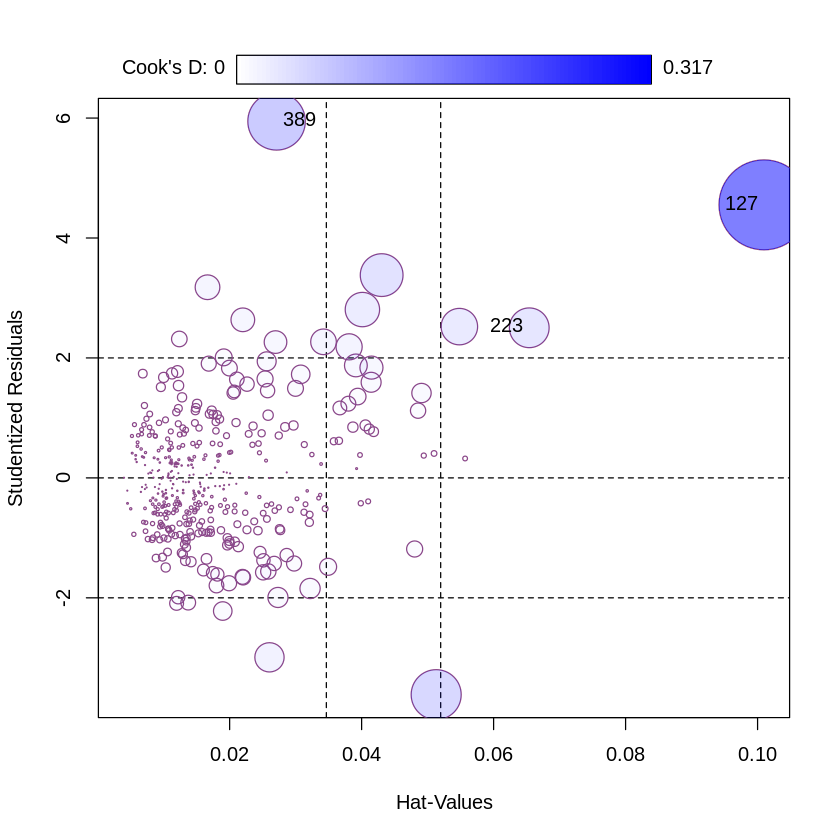

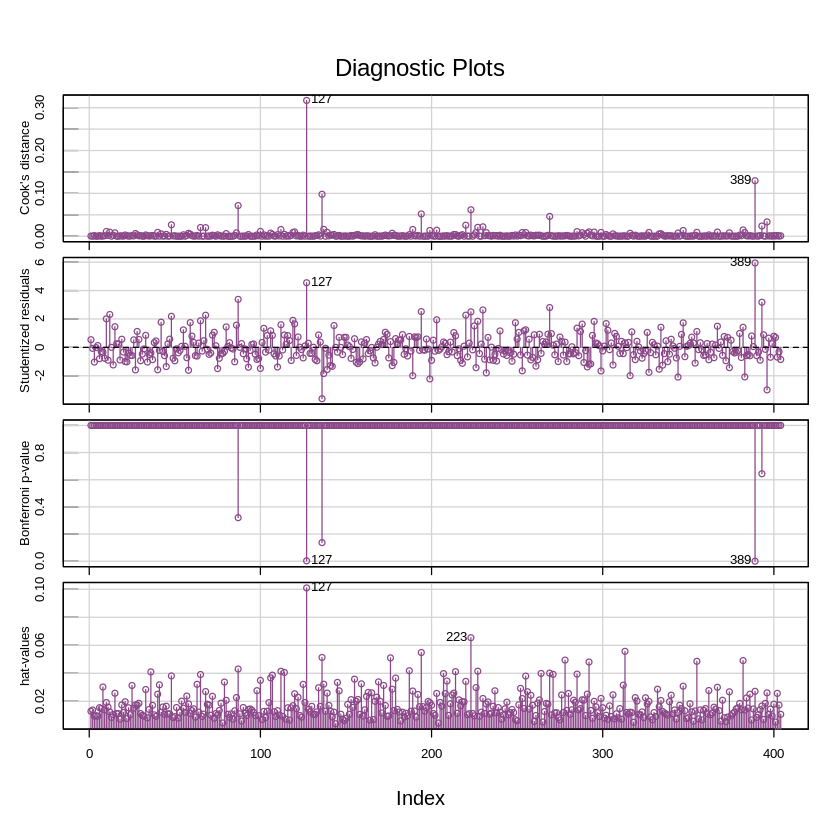

In [ ]:
#Creating influence plots for the third model
influencePlot(model_3, col = 'orchid4')
influenceIndexPlot(model_3, col = 'orchid4')

We can see there are some high leverage points, the ones with darker blue circles (127, 223, 389). These will have a significant influence on the regression model. There are also some outliers that will impact model predictions, the circles that are far away from the main cluster. Potential improvements include removing the suggested data rows for a more accurate prediction.

We can also see the same points (127 and 223) have high hat values and (127 and 389) have high Cook's distance. This indicates that we should try removing these values to see if it improves the model precictions.

#Now creating a model with the specified rows of data removed:


Call:
lm(formula = medv ~ log(crim) + zn + rm + log(dis) + ptratio + 
    log(lstat), data = data_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.3740  -2.6165  -0.2861   2.3724  17.5621 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.01387    4.51093   6.875 2.43e-11 ***
log(crim)   -0.65048    0.16211  -4.013 7.19e-05 ***
zn          -0.02304    0.01212  -1.901   0.0581 .  
rm           4.45396    0.43411  10.260  < 2e-16 ***
log(dis)    -2.86233    0.65423  -4.375 1.56e-05 ***
ptratio     -0.77216    0.11064  -6.979 1.27e-11 ***
log(lstat)  -8.16037    0.60767 -13.429  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.195 on 394 degrees of freedom
Multiple R-squared:  0.7937,	Adjusted R-squared:  0.7905 
F-statistic: 252.6 on 6 and 394 DF,  p-value: < 2.2e-16


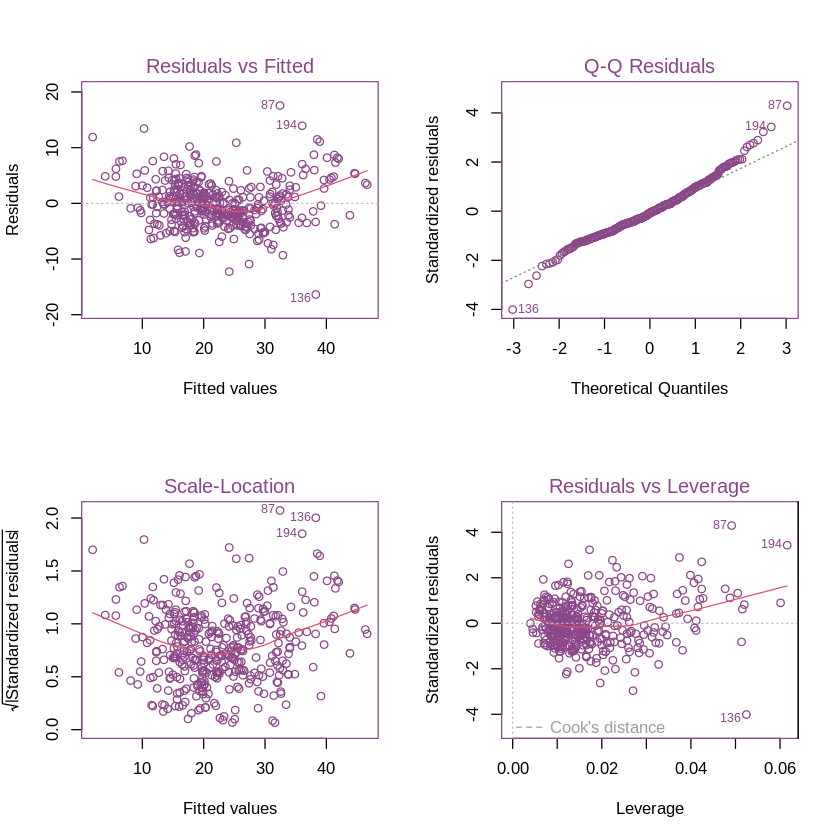

In [ ]:
#Fitting a multiple linear regression model with the adjusted variables and specified rows of data removed
data_1 <- data[-127, ]
data_2 <- data_1[-222, ]
data_3 <- data_2[-387, ]



model_4 <- lm(medv ~ log(crim) + zn + rm + log(dis) + ptratio + log(lstat), data = data_3)
summary(model_4)

#Saving the model for later
save(model_4, file = 'model_4')

#Summary graphs of the linear model.
par(mfrow = c(2,2), col = 'orchid4')
plot(model_4)





#Part B

In [ ]:
#Loading the data
data_test <- read.csv('BostonTest.csv')
str(data_test)

'data.frame':	102 obs. of  8 variables:
 $ medv   : num  23.6 32.4 13.6 22.8 16.1 20 17.8 14 19.6 16.8 ...
 $ crim   : num  0.0918 0.0564 0.1057 0.0916 5.0902 ...
 $ zn     : num  0 40 0 0 0 0 0 0 0 0 ...
 $ rm     : num  6.42 6.76 5.98 6.07 6.3 ...
 $ age    : num  84.1 32.9 98.8 7.8 91.8 74.5 83.2 93.6 90.7 79.7 ...
 $ dis    : num  2.65 4.08 1.87 5.29 2.37 ...
 $ ptratio: num  16.6 17.6 20.1 19.2 20.2 18.7 18.4 21.2 20.2 19.2 ...
 $ lstat  : num  9.04 3.53 18.07 5.52 17.27 ...


The best model from part a was model 4, the linear regression model where some of the variables were adjusted using log(), age was removed, and some of the rows of data were removed.

In [ ]:
#Loading the best model from part a
load('model_4')

#Using the model to make predictions
predictions <- predict(model_4, data_test)
print(predictions)

#Creating a data frame to compare predictions with actual results
results <- data.frame(
  Actual = data_test$medv,
  predicted = predictions
)

#Fitting a simple linear regression model
lm_model <- lm(medv ~ crim, data = data_test)
#lm_predictions <- predict(lm_model, data_test)

#Plotting this
#par(mfrow = c(2,2), col = 'orchid4')
#plot(lm_model)

        1         2         3         4         5         6         7         8 
27.574383 34.156250 18.196127 26.048638 16.687984 21.766379 16.189817 15.591252 
        9        10        11        12        13        14        15        16 
18.165312 19.658087 19.700602 18.317179  2.147292 21.080679 17.580326 22.802305 
       17        18        19        20        21        22        23        24 
18.571327  6.171222 42.073138 15.530324 25.520692 26.852919 10.590362 24.851461 
       25        26        27        28        29        30        31        32 
16.629337 12.039846 22.022144 17.396721 17.205761 18.216201 19.637482 25.222626 
       33        34        35        36        37        38        39        40 
24.063070 17.379110 13.550033 20.689092 35.652210 20.389816 18.913083 23.813087 
       41        42        43        44        45        46        47        48 
13.157077 28.719797 42.493578 16.003432 26.854291 14.549969 12.543499 26.035648 
       49        50        5

In [ ]:
#Calculating the MSE of our predictions
actuals <- data_test$medv
mse_best <- mean((actuals - predictions)^2)

#Predicting using the lm model
lm_predictions <- predict(lm_model, data_test)

mse_lm <- mean((actuals - lm_predictions)^2)

#Calculating the mean absolute error
mae_best <- mean(abs(actuals - predictions))
mae_lm <- mean(abs(actuals - lm_predictions))

#Calculating residuals
results$residuals <- results$Actual - results$predicted

#Caluclate residual standard error (RSE)
n <- length(results$Actual)
p <- length(coef(model_4))
rse <- sqrt(sum(results$residuals^2) / (n - p))

#Calculating adjusted R^2
ss_total <- sum((results$Actual - mean(results$Actual))^2)
ss_residual <- sum((results$Actual - results$predicted)^2)
r_squared <- 1 - (ss_residual / ss_total)
adj_r_squared <- 1-((1- r_squared)*(n-1)/(n-p-1))

#Printing the performance metrics caluclated above
cat("Best Model - MSE:", mse_best, "MAE:", mae_best, "R²:", r_squared, "\n", "Adjusted R-squared:", adj_r_squared, "\n")
#cat("Linear Model - MSE:", mse_lm, "MAE:", mae_lm, "R²:", r2_lm, "\n", "Adjusted R-squared:", adj_r_squared, "\n")

summary(lm_model)

Best Model - MSE: 23.43823 MAE: 3.126034 R²: 0.6803898 
 Adjusted R-squared: 0.656589 



Call:
lm(formula = medv ~ crim, data = data_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.221  -4.487  -1.811   1.532  31.326 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.3126     0.8581  27.166  < 2e-16 ***
crim         -0.5025     0.1038  -4.838 4.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.785 on 100 degrees of freedom
Multiple R-squared:  0.1897,	Adjusted R-squared:  0.1816 
F-statistic: 23.41 on 1 and 100 DF,  p-value: 4.762e-06


**MSE:**<br>
The best model has a mean squared error (MSE) of 23.4823 whereas the simple linear model has a MSE of 59.42306. 23.48 < 59.42, meaning the predictions in the best model are closer to the actual values than the predictions in the simple linear model, indicating the best model is more accurate.
<br><br>


**R squared:**<br>
The R^2 for the best model is closer to 1 than in the simple linear model. Meaning our model (best model) better explains the variance in medv and our model is a better predictor. The same is true for the adjusted R^2 value, where our model's is again larger than the value in the simple linear model, (0.656589 > 0.1816), again indicating our model is a more accurate predictor.  

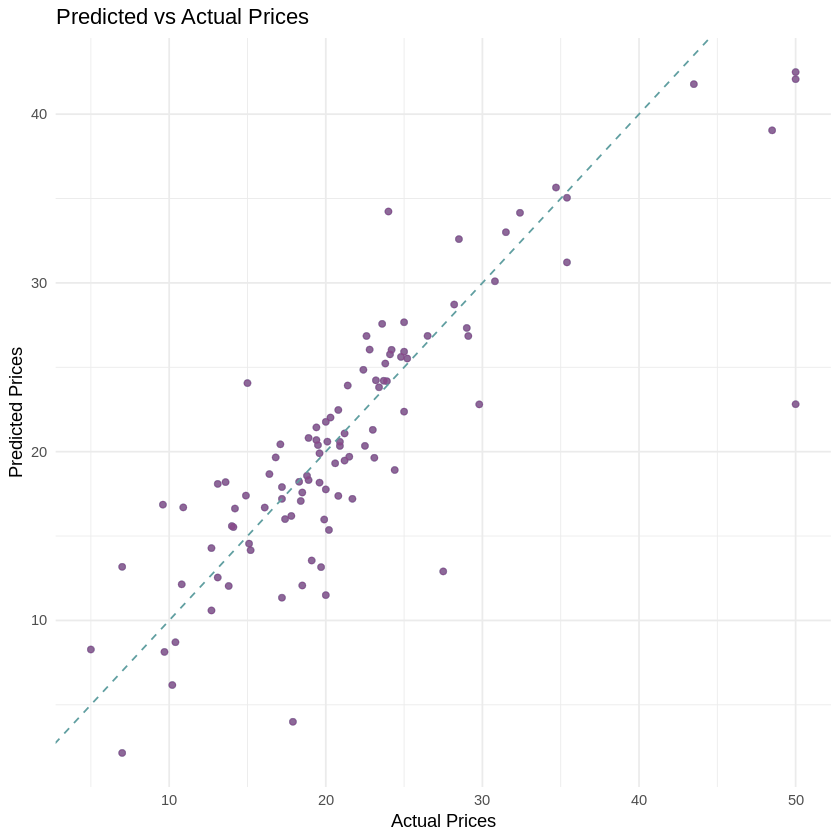

In [ ]:
ggplot() +
  geom_point(aes(x = actuals, y = predictions), color = "cadetblue", alpha = 0.7) +
  geom_point(aes(x = actuals, y = predictions), color = "orchid4", alpha = 0.7) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", colour = "cadetblue") +
  labs(title = "Predicted vs Actual Prices",
       x = "Actual Prices",
       y = "Predicted Prices") +
  theme_minimal()

The data points are generally clustered around the diagonal line, indicating that the model’s predictions align reasonably well with actual values. We can see there is a positive linear relationship with a gradient of around 1. There are some outliers indicating some possible errors in the predictions. There seems to be more outliers as the price increases which could indicate that the model is less accurate for higher priced houses. However, overall our model seems to be fairly accurate.

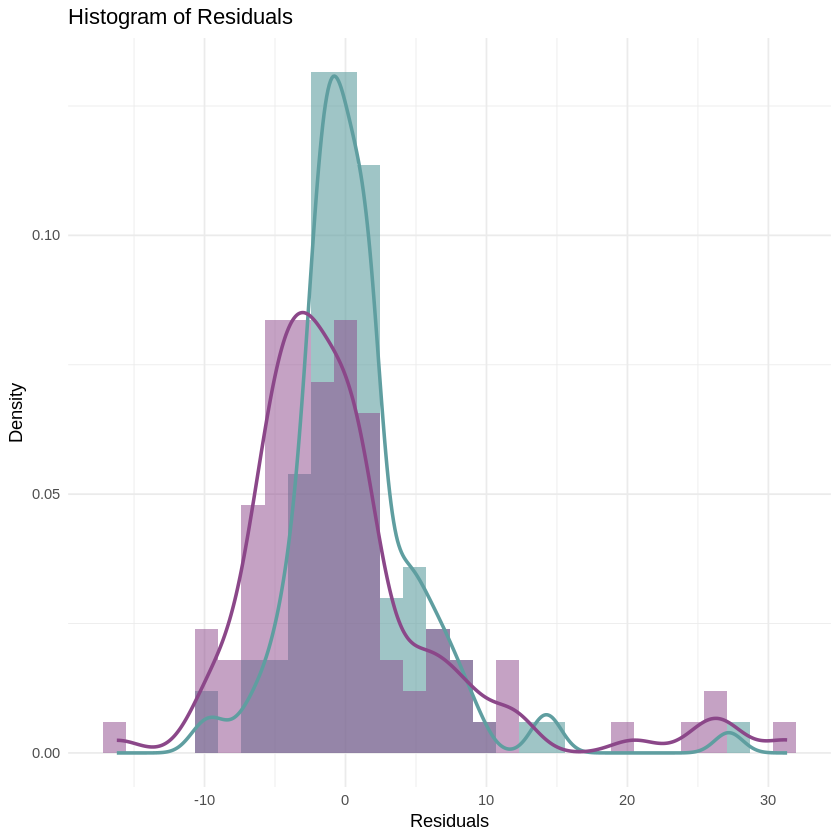

In [ ]:
# Producing a histogram of residuals with KDE curve
residuals_best <- actuals - predictions
residuals_lm <- actuals - lm_model$fitted.values

ggplot() +
  # Histogram for residuals_best
  geom_histogram(aes(residuals_best, y = ..density..), fill = "cadetblue", alpha = 0.6, bins = 30) +
  # Histogram for residuals_lm
  geom_histogram(aes(residuals_lm, y = ..density..), fill = "orchid4", alpha = 0.5, bins = 30) +

  # KDE curve for residuals_best
  geom_density(aes(residuals_best), color = "cadetblue", size = 1) +
  # KDE curve for residuals_lm
  geom_density(aes(residuals_lm), color = "orchid4", size = 1) +

  # Labels and theme
  labs(title = "Histogram of Residuals",
       x = "Residuals", y = "Density") +
  theme_minimal()

The blue histogram is the frequency of residuals from the best model and the purple residuals are the residuals from the simple linear model.

A symmetric distribution around zero means the model equally overestimates and underestimates in its predictions. Meaning the best model's predictions are better than the simple model's.

We can see the best model has a more concentrated distribution of residuals than the simple linear model. The distribution of residuals from the best model is very close to being normally distributed with the mean close to zero. Whereas the simple linear model has a more spread distribution of residuals, a right skew, peak around -2, and several outliers. The right skew indicates the simple linear model systematically underpredicts as negative residuals are more common than positive ones.

Overall, from this plot we can see the best model is far more accurate than the simple linear model.


Call:
lm(formula = medv ~ crim, data = data_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.221  -4.487  -1.811   1.532  31.326 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.3126     0.8581  27.166  < 2e-16 ***
crim         -0.5025     0.1038  -4.838 4.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.785 on 100 degrees of freedom
Multiple R-squared:  0.1897,	Adjusted R-squared:  0.1816 
F-statistic: 23.41 on 1 and 100 DF,  p-value: 4.762e-06


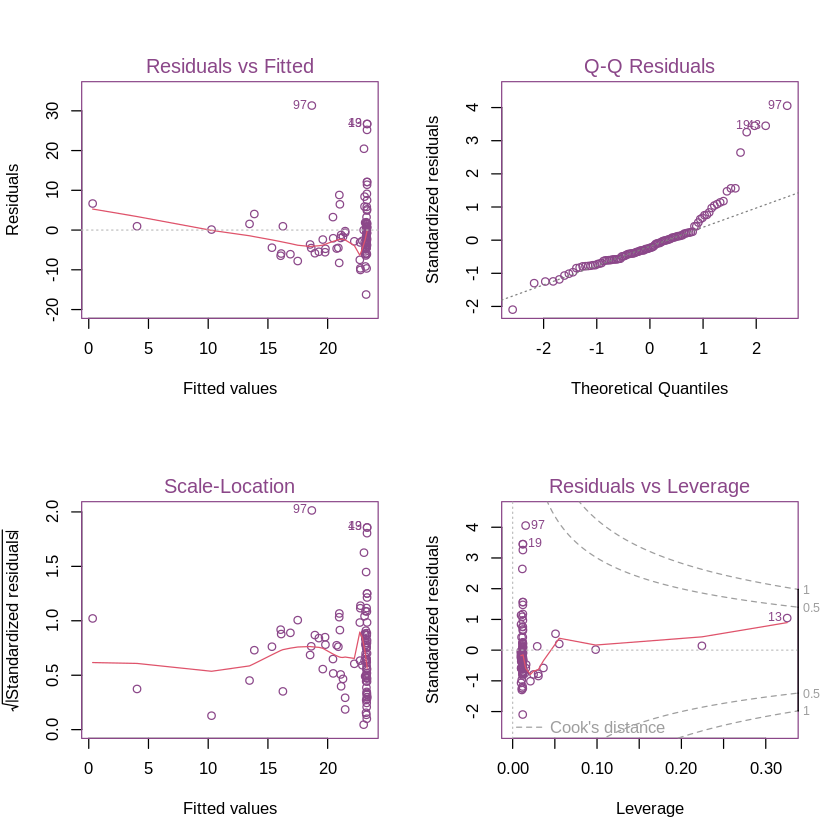

In [ ]:
summary(lm_model)
par(mfrow = c(2, 2), col = "orchid4")
plot(lm_model)

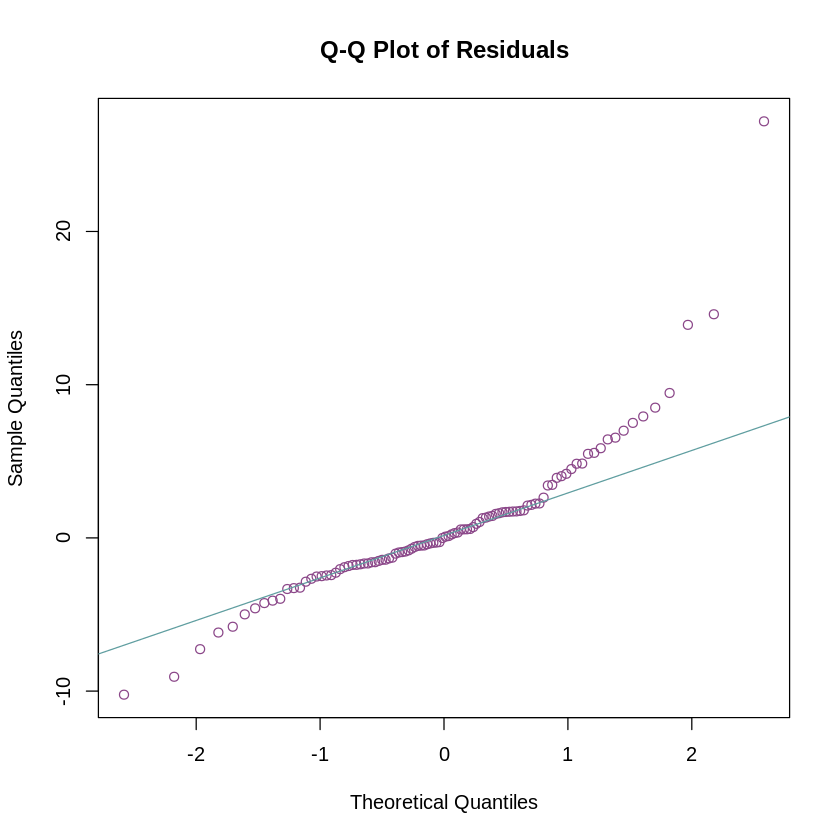

In [ ]:
#Creating a Q-Q plot
qqnorm(results$residuals, main = "Q-Q Plot of Residuals", col = "orchid4")
qqline(results$residuals, col = "cadetblue")


We can see that the points do somewhat follow the diagonal reference line. There is some deviation from the diagonal line at both higher and lower sides. In comparison to the basic linear model, we can see that our model has less outliers suggesting our model is slightly better in this regard.

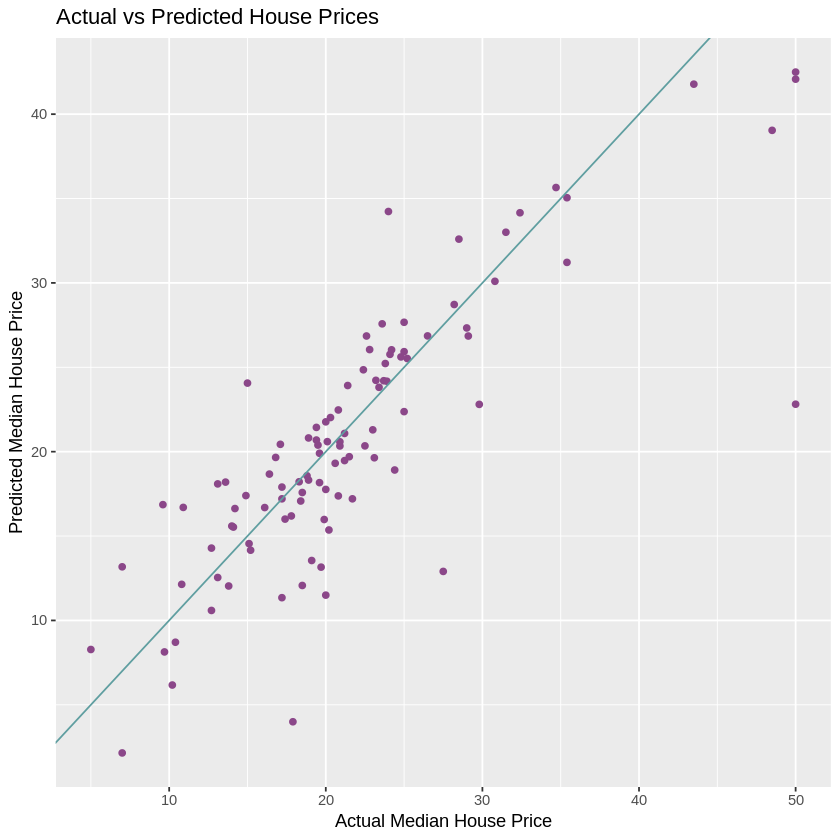

In [ ]:
ggplot(results, aes(x = Actual, y = predicted)) +
  geom_point(colour = "orchid4") +
  geom_abline(slope = 1, intercept = 0, colour = "cadetblue") +
  labs(title = "Actual vs Predicted House Prices", x = "Actual Median House Price", y = "Predicted Median House Price")

There is a strong positive correlation bewteen our predicted median house price and the actual house price, indicating that our model does a relatively good job of making predictions. There are some outliers, these are mostly at the more extreme edges of actual median house price. This indicates the model is best at predicting mid-range properties.

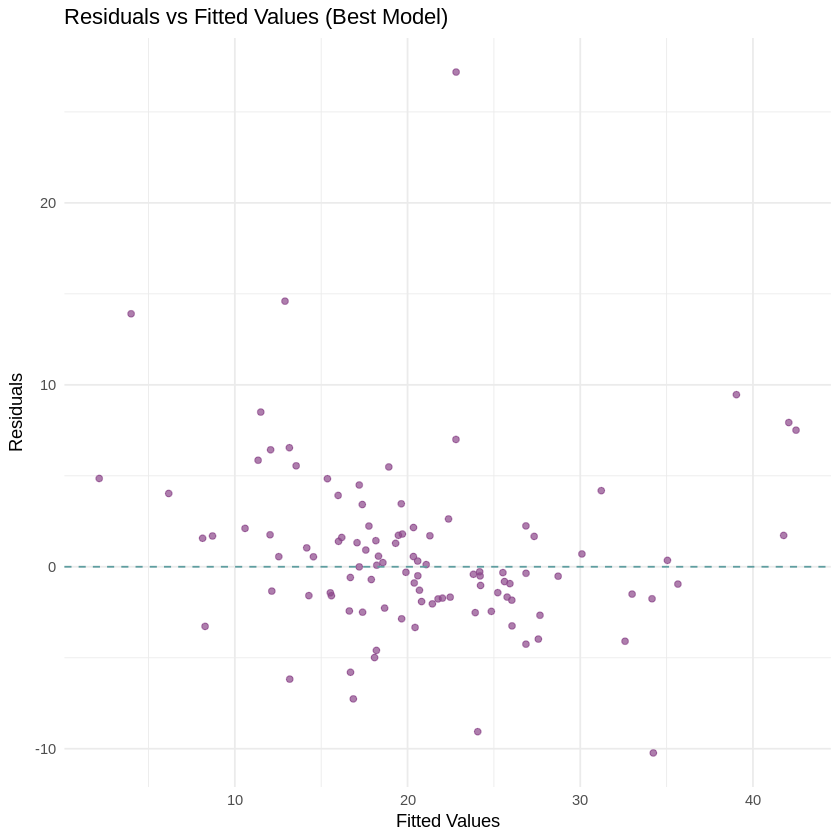

In [ ]:
ggplot() +
  geom_point(aes(x = best_model_predictions, y = residuals_best), color = "orchid4", alpha = 0.7) +
  geom_hline(yintercept = 0, linetype = "dashed", colour = "cadetblue") +
  labs(title = "Residuals vs Fitted Values (Best Model)",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

The residuals should be roughly scattered around the zero line. Which we roughly have, excluding the few outliers.

#Overall:

Our model is far from perfect, however we can see that it is better than the simple linear model. So overall, our model is able to predict the median house price to some extent.